In [1]:
# Import the necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from keras import backend
from numpy import asarray
from matplotlib import pyplot
import math
import pylab
import random
import numpy as np
import pandas as pd
import time
import csv

In [2]:
# Globals and Funcs

# Path to training file
TRAIN_FILE = "data/train.csv"
# Path to evaluation file
EVAL_FILE = "data/eval.csv"
# Path to model file - weights will be saved here
MODEL_FILE = "data/sin-model"
# Model log file
LOG_FILE = 'data/training-log.csv'

# Setup the figure size for plots
pylab.rcParams['figure.figsize'] = (13.0, 5.0)

# Define the lists that will hold the training data
train_x = [] # x-axis values
train_y = [] # y-axis values

# Define the lists that will hold the evaluation data
eval_x = [] # x-axis values
eval_y = [] # y-axis values

In [3]:
# Load the training data for comparison
with open(TRAIN_FILE, 'r') as csvfile:
    input_data = csv.reader(csvfile, delimiter=',')
    for row in input_data:
        train_x.append(float(row[0]))
        train_y.append(float(row[1]))

In [4]:
# Load the evaluation data
with open(EVAL_FILE, 'r') as csvfile:
    input_data = csv.reader(csvfile, delimiter=',')
    for row in input_data:
        eval_x.append(float(row[0]))
        eval_y.append(float(row[1]))

In [5]:
# Prepare the training data for presentation to the neural network

# Convert the lists to numpy arrays, helps with manipulation
eval_x = asarray(eval_x)
eval_y = asarray(eval_y)
# Print the min and max just for info
print("Min Max before scaling...")
print(eval_x.min(), eval_x.max(), eval_y.min(), eval_y.max())

# Reshape arrays into into rows and cols
# we need to do this to present info to the network
eval_x = eval_x.reshape((len(eval_x), 1))
eval_y = eval_y.reshape((len(eval_y), 1))

# Scale the training data to values between 0 and 1
# this helps the network to train and stops any one 
# value from dominating the input
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()
eval_x = scale_x.fit_transform(eval_x)
eval_y = scale_y.fit_transform(eval_y)
# Print the min and max just for info
print("Min Max after scaling...")
print(eval_x.min(), eval_x.max(), eval_y.min(), eval_y.max())

Min Max before scaling...
0.017979 9.973423 -0.768058 0.655191
Min Max after scaling...
0.0 0.9999999999999999 0.0 0.9999999999999999


In [6]:
# Load the previously trained model from disk
model = keras.models.load_model(MODEL_FILE)

10/10 [==============================] - 0s 474us/step
Mean Squared Error (MSE): 0.046544


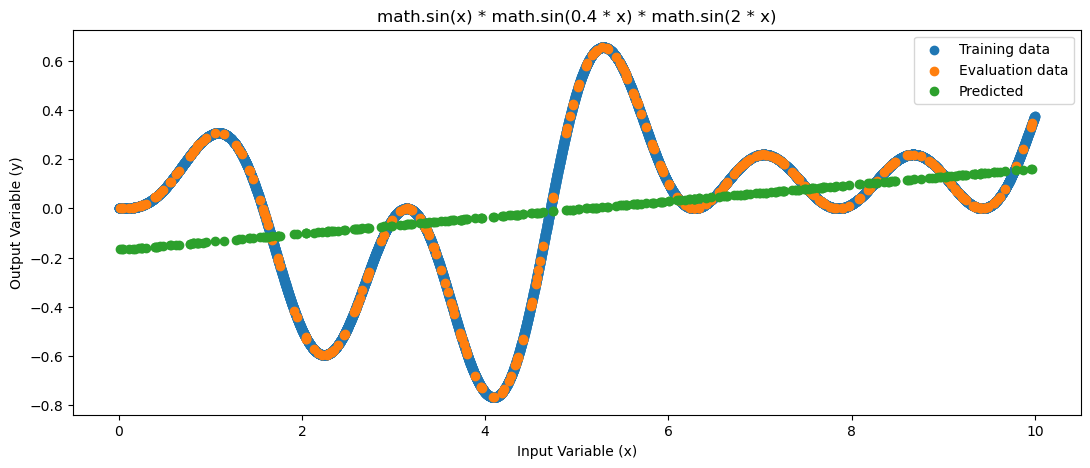

In [8]:
# Evaluate the model with the random evaluation data generated above
# pred_y is the predicated y values for our randomly generated x values (eval_x) in the range 0 - 10
pred_y = model.predict(eval_x)

# report model error
print('Mean Squared Error (MSE): %.6f' % mean_squared_error(pred_y, eval_y))

# y positions for the predicated values
pred_y_final = scale_y.inverse_transform(pred_y)
# x positions for the evaluation x values
eval_x_final = scale_x.inverse_transform(eval_x)
# y positions for the evaluation y values
eval_y_final = scale_y.inverse_transform(eval_y)

# Plot the predications so we can see how the network performs on the random evaluation data
# plot original training x and y data
pyplot.scatter(train_x, train_y, label='Training data')
# plot the correct target values
pyplot.scatter(eval_x_final, eval_y_final, label='Evaluation data')
# plot the predicated data x and y
pyplot.scatter(eval_x_final, pred_y_final, label='Predicted')

pyplot.title('math.sin(x) * math.sin(0.4 * x) * math.sin(2 * x)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.savefig("figs/sinwave_result_eval.jpg")
pyplot.show()